<a href="https://colab.research.google.com/github/diebba/cv/blob/main/01_EDA_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Exploratory Data Analysis (EDA)
This notebook explores the Heart Disease dataset to understand data structure, variable distributions, relationships, and key patterns. Insights from EDA will guide feature engineering and model selection in later steps.

### **Business Questions Addressed**
1. Which patient characteristics most strongly predict heart disease risk?  
2. Which medical factors are most related to heart disease in this dataset?  
3. Are there noticeable differences between patients with and without heart disease?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look good
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Load dataset (make sure name matches your uploaded file)
df = pd.read_csv("heart_disease_uci.csv")

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## 📊 Data Structure & Basic Information
Before exploring relationships, we first review the dataset's shape, variable types, and missing values.


In [2]:
# Shape of dataset
print("Rows, Columns:", df.shape)

# Data types
df.info()

# Summary stats
df.describe()

# Missing values
df.isnull().sum()

Rows, Columns: (920, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


## 🏷️ Creating a Binary Target Variable
The original `num` column contains values from 0–4.  
For simplicity and modeling purposes, we convert this into a binary target:

- **0 = No heart disease**  
- **1 = Heart disease present**

In [3]:
df["heart_disease"] = (df["num"] > 0).astype(int)
df["heart_disease_label"] = df["heart_disease"].map({0: "No Disease", 1: "Disease"})

df[["num", "heart_disease", "heart_disease_label"]].head()

,num,heart_disease,heart_disease_label
0,0,0,No Disease
1,2,1,Disease
2,1,1,Disease
3,0,0,No Disease
4,0,0,No Disease


# 📈 Visualizations (6 Required Plots)

These plots support our business questions and help identify factors related to heart disease.


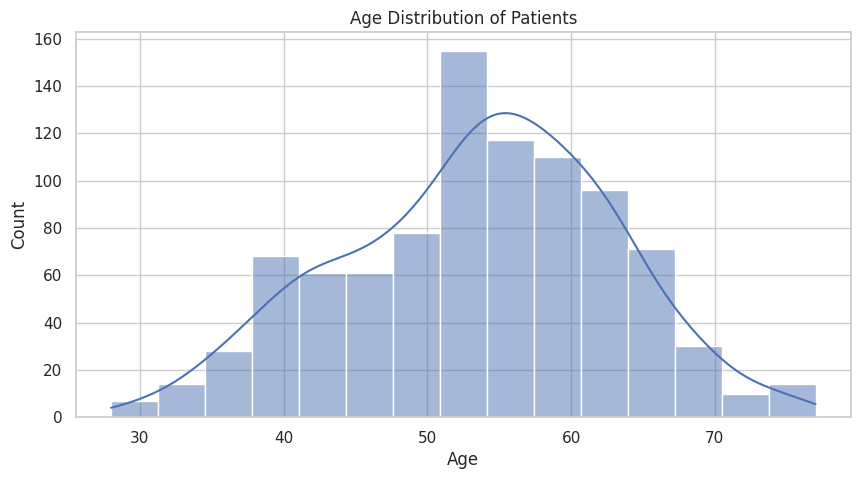

In [4]:
plt.figure()
sns.histplot(df["age"], kde=True, bins=15)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

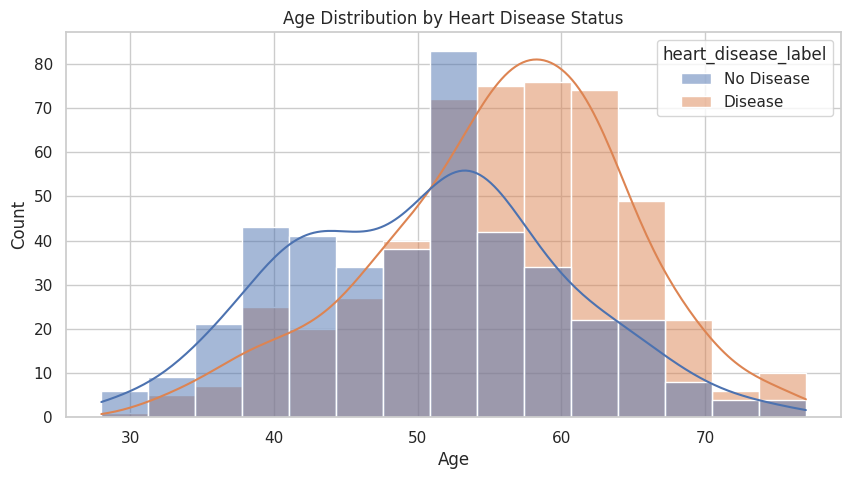

In [5]:
plt.figure()
sns.histplot(data=df, x="age", hue="heart_disease_label", bins=15, kde=True, stat="count", common_norm=False)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.show()

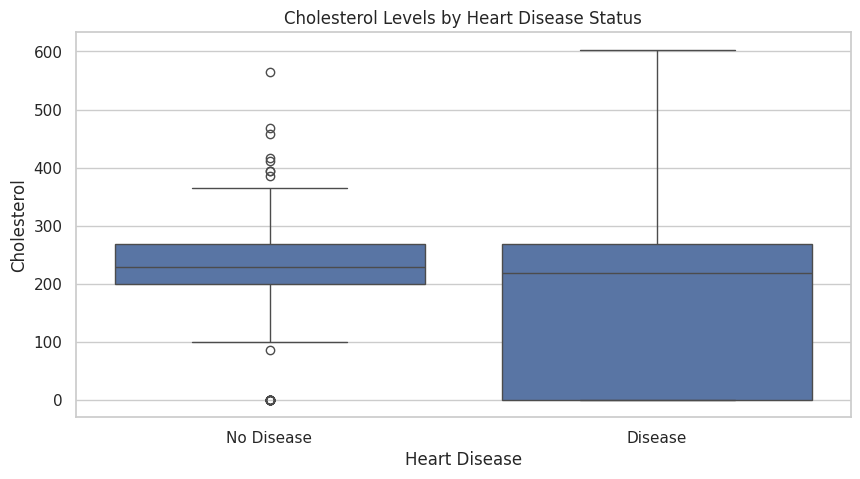

In [6]:
plt.figure()
sns.boxplot(data=df, x="heart_disease_label", y="chol")
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol")
plt.show()

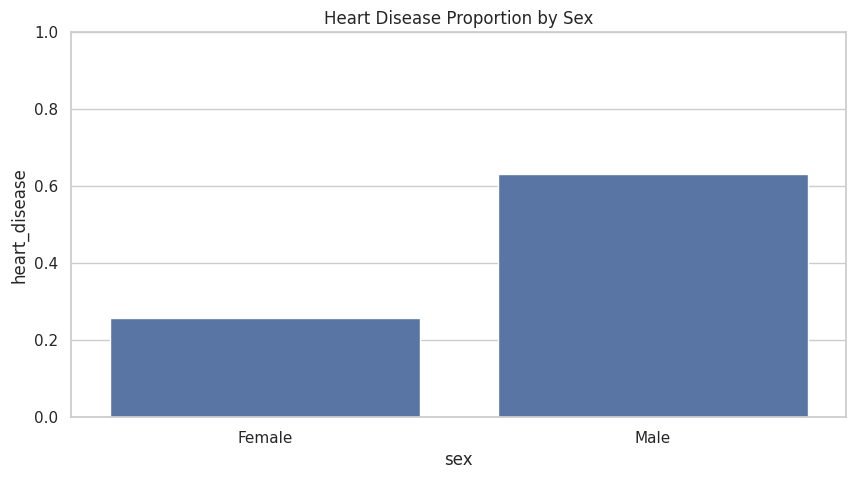

In [7]:
sex_disease_rate = df.groupby("sex")["heart_disease"].mean().reset_index()

plt.figure()
sns.barplot(data=sex_disease_rate, x="sex", y="heart_disease")
plt.title("Heart Disease Proportion by Sex")
plt.ylim(0, 1)
plt.show()

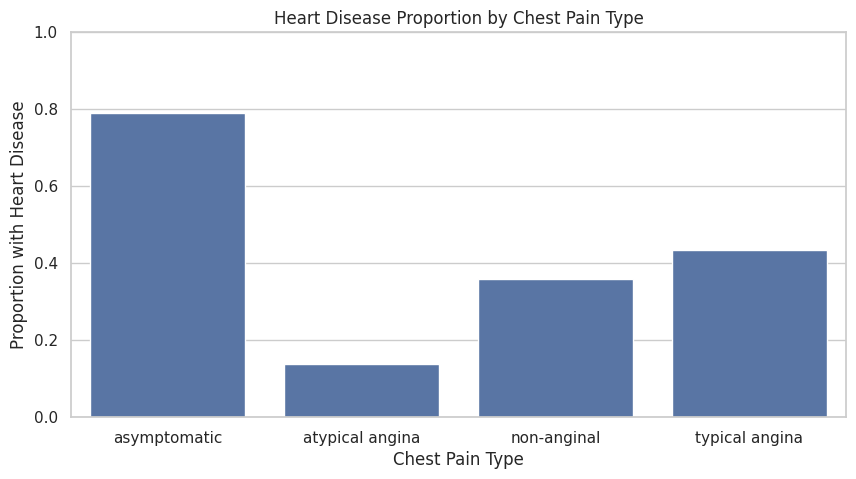

In [8]:
df["cp"] = df["cp"].astype(str)

cp_rate = df.groupby("cp")["heart_disease"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=cp_rate, x="cp", y="heart_disease")
plt.title("Heart Disease Proportion by Chest Pain Type")
plt.ylim(0, 1)
plt.xlabel("Chest Pain Type")
plt.ylabel("Proportion with Heart Disease")
plt.show()

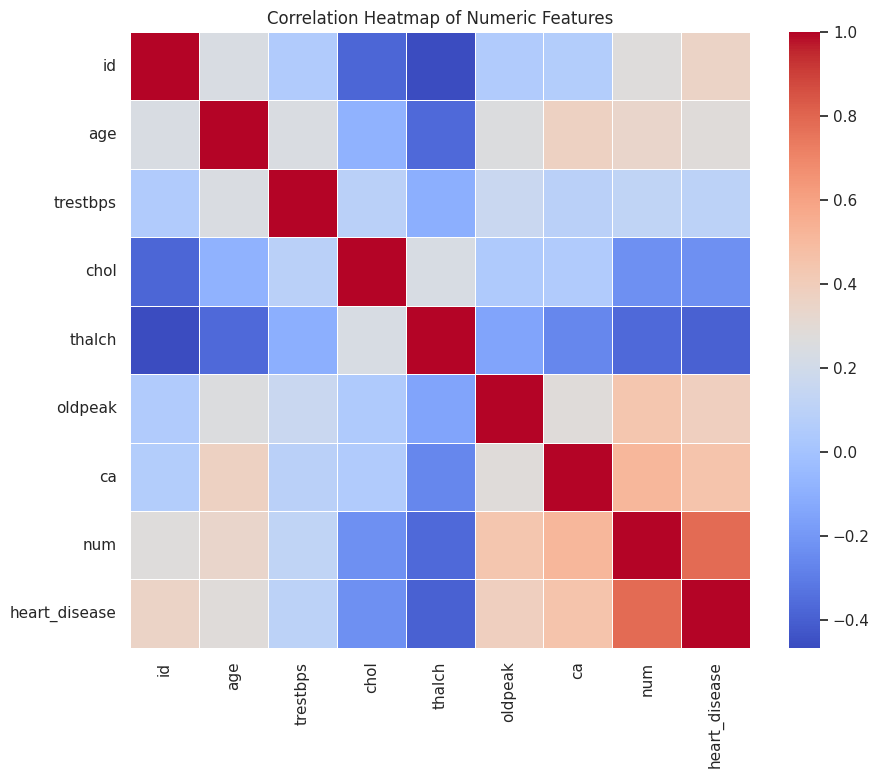

In [9]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, cmap="coolwarm", linewidths=0.5, annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 📝 Key EDA Insights

### 1. Age
- Older patients tend to have a higher rate of heart disease.
- The distribution shows most patients are between 45–65.

### 2. Cholesterol
- Cholesterol values are higher among patients with heart disease.
- Several outliers are present, especially in the disease group.

### 3. Sex
- Males have a higher proportion of heart disease than females.

### 4. Chest Pain Type
- "Asymptomatic" chest pain is most strongly associated with heart disease.
- Typical and atypical angina are less often connected with disease.

### 5. Correlations
- Oldpeak, chest pain type, max heart rate, ST slope, and exercise-induced angina show strong relationships with heart disease.
- Cholesterol and resting blood pressure are less predictive.

### 6. Data Quality Notes
- No major missing values.
- Some categorical variables (chest pain, ECG results, thal) will require encoding.